# Introduction

This lab will introduce you to Linear Discriminant Analysis (LDA) and how it can be used for classification. We will use scikit-learn, a popular machine learning library in Python, to implement LDA. We will also explore how the Ledoit-Wolf and Oracle Shrinkage Approximating (OAS) estimators of covariance can improve classification.

# Generate Random Data

First, we need to generate random data with a discriminative feature and noisy features. We will use scikit-learn's **make_blobs** function to generate two clusters of data with one discriminative feature. Then we will add random noise to the other features.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

# Implement LDA

Next, we will implement LDA using scikit-learn's **LinearDiscriminantAnalysis** class. We will create three classifiers:

- LDA with no shrinkage
- LDA with Ledoit-Wolf shrinkage
- LDA with OAS shrinkage

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import OAS

clf1 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage=None)
clf2 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
oa = OAS(store_precision=False, assume_centered=False)
clf3 = LinearDiscriminantAnalysis(solver="lsqr", covariance_estimator=oa)

# Train and Test Classifiers

We will train and test each classifier to see how they perform on the generated data. We will repeat this process multiple times to get an average accuracy score.

In [3]:
n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)

for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1.fit(X, y)
        clf2.fit(X, y)
        clf3.fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)

# Visualize Results

Finally, we will plot the classification accuracy for each classifier as a function of the number of features. We will use matplotlib to create the plot.

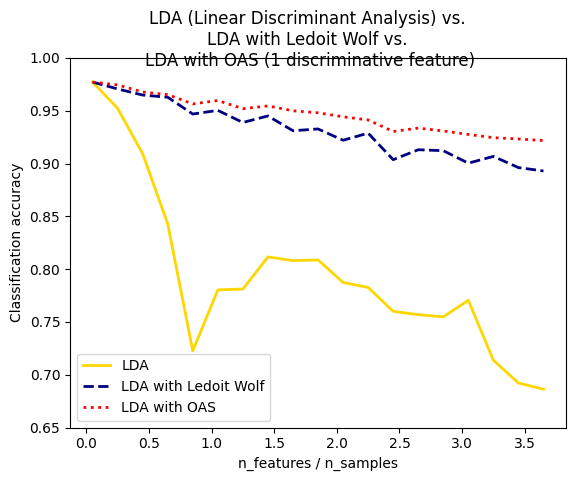

In [4]:
import matplotlib.pyplot as plt

features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(
    features_samples_ratio,
    acc_clf1,
    linewidth=2,
    label="LDA",
    color="gold",
    linestyle="solid",
)
plt.plot(
    features_samples_ratio,
    acc_clf2,
    linewidth=2,
    label="LDA with Ledoit Wolf",
    color="navy",
    linestyle="dashed",
)
plt.plot(
    features_samples_ratio,
    acc_clf3,
    linewidth=2,
    label="LDA with OAS",
    color="red",
    linestyle="dotted",
)

plt.xlabel("n_features / n_samples")
plt.ylabel("Classification accuracy")

plt.legend(loc="lower left")
plt.ylim((0.65, 1.0))
plt.suptitle(
    "LDA (Linear Discriminant Analysis) vs. "
    + "\n"
    + "LDA with Ledoit Wolf vs. "
    + "\n"
    + "LDA with OAS (1 discriminative feature)"
)
plt.show()

# Summary

In this lab, we learned how to implement Linear Discriminant Analysis (LDA) using scikit-learn. We explored how the Ledoit-Wolf and Oracle Shrinkage Approximating (OAS) estimators of covariance can improve classification accuracy. We also generated random data with a discriminative feature and tested our classifiers on this data. Finally, we visualized the classification accuracy as a function of the number of features.